In [ ]:
pip install tejapi

In [ ]:

###三寶
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tejapi
tejapi.ApiConfig.api_key=""###yourkey
from sklearn.preprocessing import MinMaxScaler

##################
from tqdm import tqdm, trange
#from tqdm.notebook import tqdm googlecolab
import tensorflow as tf

from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,GRU
from sklearn.metrics import mean_absolute_error,mean_squared_error


def root_mean_squared_error(y_true, y_pred):
        return np.sqrt(np.mean(np.square(y_pred - y_true)))


def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

def lstm_model(input_length, input_dim):

    d=0.3
    model= Sequential()
    model.add(LSTM(64,input_shape=(input_length, input_dim),return_sequences=True))
    model.add(Dropout(d))

    model.add(LSTM(32,input_shape=(input_length, input_dim),return_sequences=False))
    model.add(Dropout(d))

    model.add(Dense(1,activation='linear'))#linear / softmax(多分類) / sigmoid(二分法)

    # optimizer = tf.keras.optimizers.Adam(lr=0.00005)
    model.compile(loss='mse',optimizer='adam')#loss=mse/categorical_crossentropy
    return model




In [ ]:
def lstm_model0(input_length, input_dim):

    d=0.3
    model= Sequential()
    model.add(LSTM(32,input_shape=(input_length, input_dim),return_sequences=False))
    model.add(Dropout(d))

    model.add(Dense(1,activation='linear'))#linear / softmax(多分類) / sigmoid(二分法)

    # optimizer = tf.keras.optimizers.Adam(lr=0.00005)
    model.compile(loss='mse',optimizer='adam')#loss=mse/categorical_crossentropy
    return model


In [ ]:
def gru_model(input_length, input_dim):

    d=0.3
    model= Sequential()
    model.add(GRU(64,input_shape=(input_length, input_dim),return_sequences=True))
    model.add(Dropout(d))

    model.add(GRU(32,input_shape=(input_length, input_dim),return_sequences=False))
    model.add(Dropout(d))

    model.add(Dense(1,activation='linear',kernel_initializer="uniform"))#linear / softmax(多分類) / sigmoid(二分法)

    # optimizer = tf.keras.optimizers.Adam(lr=0.00005)
    model.compile(loss='mse',optimizer='adam')#loss=mse/categorical_crossentropy
    return model

In [ ]:
def gru_model1(input_length, input_dim):

    d=0.3
    model= Sequential()
    model.add(GRU(128,input_shape=(input_length, input_dim),return_sequences=True))
    model.add(Dropout(d))

    model.add(GRU(64,input_shape=(input_length, input_dim),return_sequences=False))
    model.add(Dropout(d))

    model.add(Dense(1,activation='linear',kernel_initializer="uniform"))#linear / softmax(多分類) / sigmoid(二分法)

    # optimizer = tf.keras.optimizers.Adam(lr=0.00005)
    model.compile(loss='mse',optimizer='adam')#loss=mse/categorical_crossentropy
    return model

In [ ]:
def lstm_model1(input_length, input_dim):

    d=0.3
    model= Sequential()
    model.add(LSTM(128,input_shape=(input_length, input_dim),return_sequences=True))
    model.add(Dropout(d))

    model.add(LSTM(64,input_shape=(input_length, input_dim),return_sequences=False))
    model.add(Dropout(d))

    model.add(Dense(1,activation='linear'))#linear / softmax(多分類) / sigmoid(二分法)

    # optimizer = tf.keras.optimizers.Adam(lr=0.00005)
    model.compile(loss='mse',optimizer='adam')#loss=mse/categorical_crossentropy
    return model

In [ ]:
def lstm_model2(input_length, input_dim):

    d=0.3
    model= Sequential()
    model.add(LSTM(256,input_shape=(input_length, input_dim),return_sequences=True))
    model.add(Dropout(d))

    model.add(LSTM(128,input_shape=(input_length, input_dim),return_sequences=False))
    model.add(Dropout(d))
    model.add(Dense(16,activation='linear'))#linear / softmax(多分類) / sigmoid(二分法)
    model.add(Dropout(d))

    model.add(Dense(1,activation='linear'))#linear / softmax(多分類) / sigmoid(二分法)

    # optimizer = tf.keras.optimizers.Adam(lr=0.00005)
    model.compile(loss='mse',optimizer='adam')#loss=mse/categorical_crossentropy
    return model

In [ ]:
coid='2317'
start='2018-01-01'
end='2022-5-22'
opts={'columns': ['open_d' ,'high_d','low_d','mdate', 'volume','close_d']}
tw=tejapi.get('TWN/EWPRCD',coid=coid,
                mdate={'gt':start,'lt':end},
                paginate=True,
                chinese_column_name=True,
                opts=opts
                )
tw.set_index("日期",drop=True,inplace=True)
tw.sort_index(inplace=True)


In [ ]:

# lcd[~(lcd['收盤價-除權息'])]
y =tw["收盤價"]
x =tw


In [ ]:
x

,開盤價,最高價,最低價,成交量(千股),收盤價
日期,,,,,
2018-01-02 00:00:00+00:00,95.4,95.7,94.3,28602.316,95.0
2018-01-03 00:00:00+00:00,95.0,95.3,94.0,58507.086,94.0
2018-01-04 00:00:00+00:00,93.6,93.9,92.5,53756.400,92.6
2018-01-05 00:00:00+00:00,92.3,93.0,91.6,59252.732,93.0
2018-01-08 00:00:00+00:00,92.3,92.6,91.7,50081.699,91.8
...,...,...,...,...,...
2022-05-04 00:00:00+00:00,103.5,104.5,103.0,31111.663,104.0
2022-05-05 00:00:00+00:00,105.0,105.5,104.0,44182.291,104.5
2022-05-06 00:00:00+00:00,103.5,104.0,102.5,27888.783,104.0


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
y=scaler.fit_transform(y.to_frame())

scaler1=MinMaxScaler(feature_range=(0,1))
x=scaler1.fit_transform(x)

x,y=multivariate_data( x ,y , 0 ,None, 10 , 1 ,single_step=True)


split =0.95


x_,y_  = x[0:int(split*len(x))] , y[0:int(split*len(x))]

x_test ,y_test   = x[int(split*len(x)):] , y[int(split*len(x)):]
split= 0.8
x_train,y_train  =x_[:int(split*len(x_))] , y_[:int(split*len(x_))]
x_vaild,y_vaild  =x_[int(split*len(x_)):] , y_[int(split*len(x_)):]


In [ ]:
trainindex= tw.index[10:len(x_train)+10]
valindex = tw.index[len(x_train)+10:len(x_train)+10+len(x_vaild)]



In [ ]:
print(x_train.shape,y_train.shape,x_vaild.shape,y_vaild.shape,)

(796, 10, 5) (796, 1) (199, 10, 5) (199, 1)


In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=300, monitor = 'val_loss')
    ]
filepath="lstm.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, mode='min',save_best_only=True)

call_backlist = [ my_callbacks,checkpoint]
callbacks=call_backlist
lstm00 = lstm_model0(10,5)
historylstm0 = lstm0.fit( x_train, y_train, batch_size=30,shuffle=False , epochs=1000,validation_data=(x_vaild,y_vaild),callbacks=call_backlist)
lstm00.summary()


Epoch 1/1000
25/27 [==========================>...] - ETA: 0s - loss: 5.4917e-04
Epoch 1: val_loss improved from inf to 0.07002, saving model to lstm.best.hdf5
27/27 [==============================] - 0s 15ms/step - loss: 5.6613e-04 - val_loss: 0.0700
Epoch 2/1000
26/27 [===========================>..] - ETA: 0s - loss: 5.5507e-04
Epoch 2: val_loss did not improve from 0.07002
27/27 [==============================] - 0s 11ms/step - loss: 5.8248e-04 - val_loss: 0.0818
Epoch 3/1000
25/27 [==========================>...] - ETA: 0s - loss: 7.2453e-04
Epoch 3: val_loss did not improve from 0.07002
27/27 [==============================] - 0s 12ms/step - loss: 7.5187e-04 - val_loss: 0.0770
Epoch 4/1000
25/27 [==========================>...] - ETA: 0s - loss: 5.1479e-04
Epoch 4: val_loss did not improve from 0.07002
27/27 [==============================] - 0s 10ms/step - loss: 5.8382e-04 - val_loss: 0.0813
Epoch 5/1000
25/27 [==========================>...] - ETA: 0s - loss: 7.0963e-04
Epoch 5

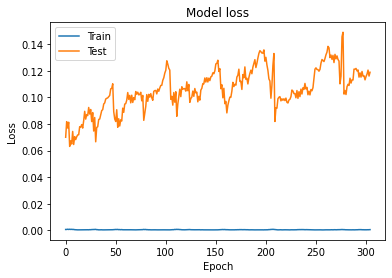

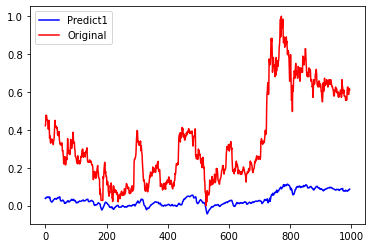

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0, flags=flags)


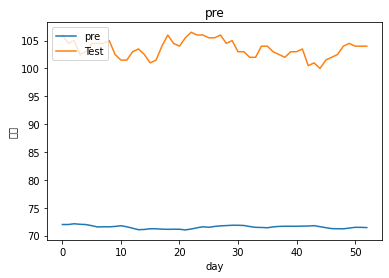

32.07327248396836

In [ ]:
lstm0train  = lstm00.predict(x_train)
lstm0val = lstm00.predict(x_vaild)
lstm0pre = lstm00.predict(x_test)
plt.plot(historylstm0.history['loss'])
plt.plot(historylstm0.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

pre = lstm00.predict(x_train)
pre1=lstm00.predict(x_vaild)
fc=np.concatenate((pre,pre1))
yreal=np.concatenate((y_train,y_vaild))
plt.figure(facecolor='white')
pd.Series(fc.reshape(-1)).plot(color='blue', label='Predict1')
pd.Series(yreal.reshape(-1)).plot(color='red', label='Original')

plt.legend()
plt.show()

lstm0pre= scaler.inverse_transform(lstm0pre)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))


plt.figure()
plt.plot(lstm0pre)
plt.plot(y_test)
plt.title('pre')
plt.ylabel('股價')
plt.xlabel('day')
plt.legend(['pre', 'Test'], loc='upper left')
plt.show()
root_mean_squared_error(lstm0pre,y_test)

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=300, monitor = 'val_loss')
    ]
filepath="lstm.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, mode='min',save_best_only=True)

call_backlist = [  my_callbacks,checkpoint]
callbacks=call_backlist
lstm0 = lstm_model(10,5)

historylstm0 = lstm0.fit( x_train, y_train, batch_size=30,shuffle=False , epochs=1000,validation_data=(x_vaild,y_vaild),callbacks=call_backlist)
lstm0.summary()

Epoch 1/1000
26/27 [===========================>..] - ETA: 0s - loss: 0.0253
Epoch 1: val_loss improved from inf to 0.00644, saving model to lstm.best.hdf5
27/27 [==============================] - 5s 62ms/step - loss: 0.0257 - val_loss: 0.0064
Epoch 2/1000
25/27 [==========================>...] - ETA: 0s - loss: 0.0105
Epoch 2: val_loss improved from 0.00644 to 0.00257, saving model to lstm.best.hdf5
27/27 [==============================] - 0s 12ms/step - loss: 0.0124 - val_loss: 0.0026
Epoch 3/1000
25/27 [==========================>...] - ETA: 0s - loss: 0.0055
Epoch 3: val_loss did not improve from 0.00257
27/27 [==============================] - 0s 11ms/step - loss: 0.0069 - val_loss: 0.0027
Epoch 4/1000
24/27 [=========================>....] - ETA: 0s - loss: 0.0039
Epoch 4: val_loss did not improve from 0.00257
27/27 [==============================] - 0s 12ms/step - loss: 0.0064 - val_loss: 0.0034
Epoch 5/1000
25/27 [==========================>...] - ETA: 0s - loss: 0.0064
Epoch 5

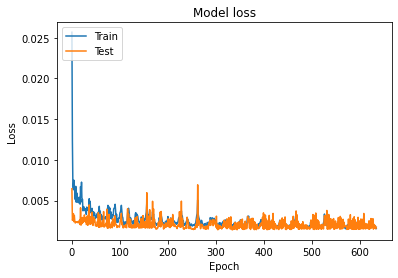

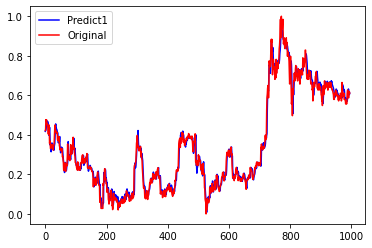

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0, flags=flags)


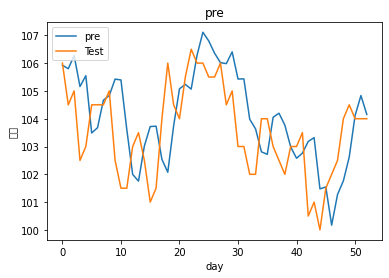

1.687943065599812

In [ ]:
lstm0train  = lstm0.predict(x_train)
lstm0val = lstm0.predict(x_vaild)
lstm0pre = lstm0.predict(x_test)
plt.plot(historylstm0.history['loss'])
plt.plot(historylstm0.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

pre = lstm0.predict(x_train)
pre1=lstm0.predict(x_vaild)
fc=np.concatenate((pre,pre1))
yreal=np.concatenate((y_train,y_vaild))
plt.figure(facecolor='white')
pd.Series(fc.reshape(-1)).plot(color='blue', label='Predict1')
pd.Series(yreal.reshape(-1)).plot(color='red', label='Original')

plt.legend()
plt.show()

lstm0pre= scaler.inverse_transform(lstm0pre)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))


plt.figure()
plt.plot(lstm0pre)
plt.plot(y_test)
plt.title('pre')
plt.ylabel('股價')
plt.xlabel('day')
plt.legend(['pre', 'Test'], loc='upper left')
plt.show()

root_mean_squared_error(lstm0pre,y_test)

In [ ]:
lstm1 =lstm_model1(10,5)
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=300, monitor = 'val_loss')
    ]
filepath="lstm.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, mode='min',save_best_only=True)

call_backlist = [ my_callbacks,checkpoint]
callbacks=call_backlist
history1 = lstm1.fit( x_train, y_train, batch_size=30,shuffle=False , epochs=1000,validation_data=(x_vaild,y_vaild),callbacks=call_backlist)
lstm1.summary()

Epoch 1/1000
23/27 [========================>.....] - ETA: 0s - loss: 0.0159
Epoch 1: val_loss improved from inf to 0.00853, saving model to lstm.best.hdf5
27/27 [==============================] - 64s 49ms/step - loss: 0.0166 - val_loss: 0.0085
Epoch 2/1000
25/27 [==========================>...] - ETA: 0s - loss: 0.0055
Epoch 2: val_loss improved from 0.00853 to 0.00486, saving model to lstm.best.hdf5
27/27 [==============================] - 0s 13ms/step - loss: 0.0065 - val_loss: 0.0049
Epoch 3/1000
25/27 [==========================>...] - ETA: 0s - loss: 0.0063
Epoch 3: val_loss improved from 0.00486 to 0.00318, saving model to lstm.best.hdf5
27/27 [==============================] - 0s 14ms/step - loss: 0.0073 - val_loss: 0.0032
Epoch 4/1000
23/27 [========================>.....] - ETA: 0s - loss: 0.0056
Epoch 4: val_loss did not improve from 0.00318
27/27 [==============================] - 0s 13ms/step - loss: 0.0067 - val_loss: 0.0048
Epoch 5/1000
25/27 [==========================>

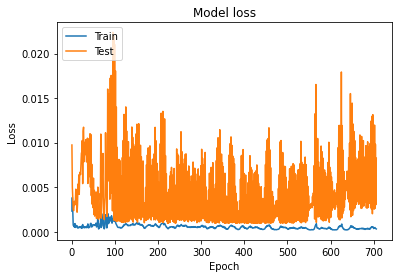

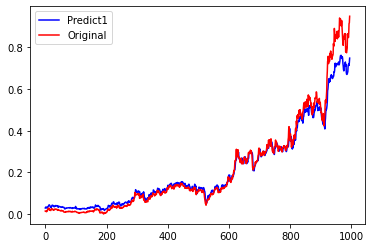

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0, flags=flags)


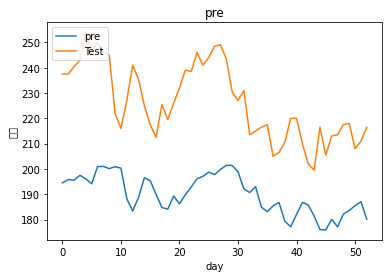

37.8760269839298

In [ ]:
lstm1train  = lstm1.predict(x_train)
lstm1val = lstm1.predict(x_vaild)
lstm1pre = lstm1.predict(x_test)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

pre = lstm1.predict(x_train)
pre1=lstm1.predict(x_vaild)
fc=np.concatenate((pre,pre1))
yreal=np.concatenate((y_train,y_vaild))
plt.figure(facecolor='white')
pd.Series(fc.reshape(-1)).plot(color='blue', label='Predict1')
pd.Series(yreal.reshape(-1)).plot(color='red', label='Original')

plt.legend()
plt.show()
lstm1pre = lstm1.predict(x_test)
pre= scaler.inverse_transform(lstm1pre)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

plt.figure()
plt.plot(pre)
plt.plot(y_test)
plt.title('pre')
plt.ylabel('股價')
plt.xlabel('day')
plt.legend(['pre', 'Test'], loc='upper left')
plt.show()

root_mean_squared_error(pre,y_test)


In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=300, monitor = 'val_loss')
    ]
filepath="lstm.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, mode='min',save_best_only=True)

call_backlist = [ my_callbacks,checkpoint]
callbacks=call_backlist
lstm2 = lstm_model2(10,5)
historylstm2 = lstm2.fit( x_train, y_train, batch_size=30,shuffle=False , epochs=1000,validation_data=(x_vaild,y_vaild),callbacks=call_backlist)
lstm2.summary()

Epoch 1/1000
25/27 [==========================>...] - ETA: 0s - loss: 0.0193
Epoch 1: val_loss improved from inf to 0.00612, saving model to lstm.best.hdf5
27/27 [==============================] - 5s 51ms/step - loss: 0.0204 - val_loss: 0.0061
Epoch 2/1000
25/27 [==========================>...] - ETA: 0s - loss: 0.0097
Epoch 2: val_loss improved from 0.00612 to 0.00271, saving model to lstm.best.hdf5
27/27 [==============================] - 0s 16ms/step - loss: 0.0112 - val_loss: 0.0027
Epoch 3/1000
25/27 [==========================>...] - ETA: 0s - loss: 0.0081
Epoch 3: val_loss did not improve from 0.00271
27/27 [==============================] - 0s 16ms/step - loss: 0.0106 - val_loss: 0.0188
Epoch 4/1000
26/27 [===========================>..] - ETA: 0s - loss: 0.0103
Epoch 4: val_loss did not improve from 0.00271
27/27 [==============================] - 0s 14ms/step - loss: 0.0114 - val_loss: 0.0030
Epoch 5/1000
25/27 [==========================>...] - ETA: 0s - loss: 0.0085
Epoch 5

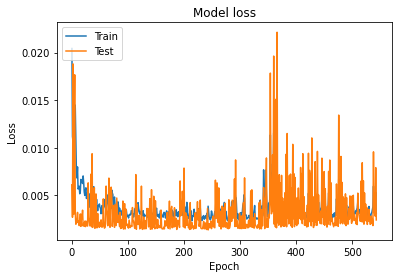

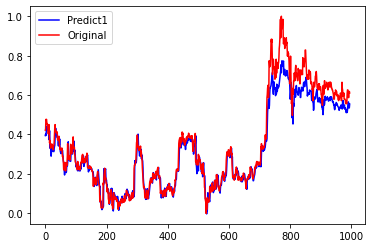

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0, flags=flags)


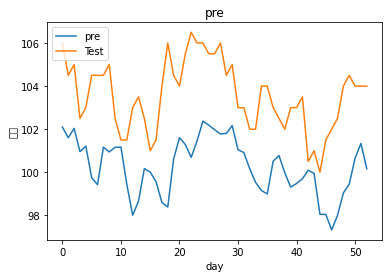

3.6100459388006616

In [ ]:
lstm1train  = lstm2.predict(x_train)
lstm1val = lstm2.predict(x_vaild)
lstm1pre = lstm2.predict(x_test)
plt.plot(historylstm2.history['loss'])
plt.plot(historylstm2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

pre = lstm1.predict(x_train)
pre1=lstm1.predict(x_vaild)
fc=np.concatenate((pre,pre1))
yreal=np.concatenate((y_train,y_vaild))
plt.figure(facecolor='white')
pd.Series(fc.reshape(-1)).plot(color='blue', label='Predict1')
pd.Series(yreal.reshape(-1)).plot(color='red', label='Original')

plt.legend()
plt.show()
lstm1pre = lstm1.predict(x_test)
pre= scaler.inverse_transform(lstm1pre)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

plt.figure()
plt.plot(pre)
plt.plot(y_test)
plt.title('pre')
plt.ylabel('股價')
plt.xlabel('day')
plt.legend(['pre', 'Test'], loc='upper left')
plt.show()

root_mean_squared_error(pre,y_test)